# IMPORTING Libraries

In [1]:
import pandas as pd
import re
from sklearn.preprocessing import MaxAbsScaler
from unidecode import unidecode
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import csv
import numpy as np 
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ameyasgandhe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ameyasgandhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ameyasgandhe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ameyasgandhe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Loading Data 

In [2]:
# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data["TEXT"]=train_data["TEXT"].astype(str)

In [3]:
train_data

,ID,TEXT,LABEL
0,7850790573542594519,If you love good films don't ever buy this pei...,2
1,9392069522632994700,The 33 percent of the nations nitwits that sti...,2
2,5083704536542443514,I saw Anatomy years ago -- dubbed at a friends...,1
3,12418349755186772171,Dark Remains is a home run plain and simple. T...,1
4,12144957944004619479,Feh. This movie started out in an interesting ...,2
...,...,...,...
70312,4533411613007495120,"I grew up looking for fairies in my backyard, ...",0
70313,2075555016956547354,"Jeff King,a guy I know from work,LOVES this Mo...",2
70314,5446360756235190232,I love the way Inder writes this story. Honest...,0
70315,11502529898454172361,I watched this movie recently and fell in love...,1


In [4]:
test_data.head()

,ID,TEXT
0,4728459160322025755,An excellent debut movie for the the director ...
1,1840432070229003467,If you have a preschooler or remember how stre...
2,12623336783082722606,What should have been a routine babysitting gi...
3,7446733850828603409,Cute but
4,16180660281866613068,"Elvis Presley plays a ""half-breed"" Native Amer..."


In [5]:
train_data['LABEL'].value_counts()

0    32071
1    19276
2    18970
Name: LABEL, dtype: int64

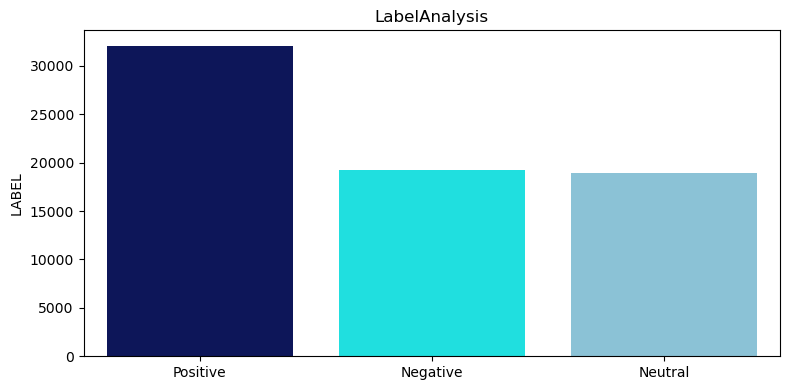

In [6]:
colors = ['#000C66','#00FFFF', '#7EC8E3']
labels = ['Positive', 'Negative', 'Neutral']
values = pd.Series(train_data['LABEL']).value_counts()

plt.figure(figsize=(8, 4), tight_layout=True)
sns.barplot(x=labels, y=values, palette=colors)
plt.title('LabelAnalysis')
plt.savefig('LabelAnalysis.png')
plt.show()

# Text Preprocessing

In [7]:
train_data["TEXT"]=train_data["TEXT"].astype(str)
test_data["TEXT"]=test_data["TEXT"].astype(str)

In [8]:
train_data.head(5)

,ID,TEXT,LABEL
0,7850790573542594519,If you love good films don't ever buy this pei...,2
1,9392069522632994700,The 33 percent of the nations nitwits that sti...,2
2,5083704536542443514,I saw Anatomy years ago -- dubbed at a friends...,1
3,12418349755186772171,Dark Remains is a home run plain and simple. T...,1
4,12144957944004619479,Feh. This movie started out in an interesting ...,2


In [9]:
test_data.head(5)

,ID,TEXT
0,4728459160322025755,An excellent debut movie for the the director ...
1,1840432070229003467,If you have a preschooler or remember how stre...
2,12623336783082722606,What should have been a routine babysitting gi...
3,7446733850828603409,Cute but
4,16180660281866613068,"Elvis Presley plays a ""half-breed"" Native Amer..."


In [10]:
# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [11]:
def preprocess_text(text):
    # Remove any special characters, numbers, and punctuation marks
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text.lower())
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into a single string
    return ' '.join(tokens)


# Removing Stopwords

In [12]:
train_data["TEXT"]=train_data["TEXT"].apply(preprocess_text)
test_data["TEXT"]=test_data["TEXT"].astype(str)
test_data["TEXT"]=test_data["TEXT"].apply(preprocess_text)

In [13]:
train_data['TEXT']

0                  love good film dont ever buy peice crap
1        percent nation nitwit still support w bush wou...
2        saw anatomy year ago dubbed friend house dont ...
3        dark remains home run plain simple film full c...
4        feh movie started interesting manner quickly r...
                               ...                        
70312    grew looking fairy backyard using book guide c...
70313    jeff kinga guy know workloves movieespecially ...
70314    love way inder writes story honest true thank ...
70315    watched movie recently fell love loved storyli...
70316    из фунтов муки испечено белых хлебов сколько м...
Name: TEXT, Length: 70317, dtype: object

In [14]:
def remove(df):
    html_pattern = re.compile("<.*?>")
    url_pattern = re.compile("(?P<url>https?://[^\s]+)")

    df['TEXT'] = df['TEXT'].apply(lambda x: re.sub(url_pattern, '', x))
    df['TEXT'] = df['TEXT'].apply(lambda x: re.sub(html_pattern, '', x))

    return df

In [15]:
d1=remove(train_data)
d2=remove(test_data)

In [16]:
np.random.seed(42)

In [17]:
X=d1["TEXT"]
y=d1["LABEL"]

In [20]:
X_real_test=d2["TEXT"]
# y_real_test=d2["LABEL"]

In [21]:
# Split the train_data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
x_test= d2["TEXT"]


In [22]:
# Create a TfidfVectorizer for feature extraction
vectorizer_log = TfidfVectorizer(stop_words='english', lowercase=False)
model_log = LogisticRegression(max_iter=900, C=1, solver='sag')
X_train_tfidf_log = vectorizer_log.fit_transform(X)
x_real_test_tfidf_log=vectorizer_log.transform(X_real_test)

In [23]:
#X_train_tfidf.shape

In [24]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

def remove(df):
    html_pattern = re.compile("<.*?>")
    url_pattern = re.compile("(?P<url>https?://[^\s]+)")

    df['TEXT'] = df['TEXT'].apply(lambda x: re.sub(url_pattern, '', x))
    df['TEXT'] = df['TEXT'].apply(lambda x: re.sub(html_pattern, '', x))

    return df

d1 = remove(train_data)

X = d1["TEXT"]
y = d1["LABEL"]

# Create a TfidfVectorizer for feature extraction
vectorizer = TfidfVectorizer(stop_words='english', lowercase=False)

X_tfidf = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)


svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_y_pred = svm_clf.predict(X_test)

print("SVM Classifier Results:")
print("Accuracy score:", accuracy_score(y_test, svm_y_pred))
print("F1-score:", f1_score(y_test, svm_y_pred, average='macro'))


## Also tried implementing grid search along with svm. It look too long to run this chunk of code.
# # Support Vector Machine (SVM) classifier
# svm_clf = SVC()

# # Define the parameter grid
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
# }

# # Perform grid search
# grid_search = GridSearchCV(svm_clf, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best parameters:", best_params)

# # Train the SVM classifier with the best parameters
# best_svm_clf = SVC(C=best_params['C'], kernel=best_params['kernel'])
# best_svm_clf.fit(X_train, y_train)
# svm_y_pred = best_svm_clf.predict(X_test)

# print("SVM Classifier Results:")
# print("Accuracy score:", accuracy_score(y_test, svm_y_pred))
# print("F1-score:", f1_score(y_test, svm_y_pred, average='macro'))



SVM Classifier Results:
Accuracy score: 0.9169510807736063
F1-score: 0.9036839744300317


In [32]:
svm_y_pred

array([1, 0, 2, ..., 2, 0, 1], dtype=int64)

In [34]:
# Make predictions on the test dataset
test_data['LABEL'] = svm_y_pred
test_data = test_data.drop(columns=["TEXT"], axis=1)
test_data

,ID,LABEL
0,4728459160322025755,1
1,1840432070229003467,0
2,12623336783082722606,2
3,7446733850828603409,2
4,16180660281866613068,1
...,...,...
17575,15460118162570972562,0
17576,2679547768967862209,2
17577,2966026531113989116,2
17578,10698695044532313190,0


In [35]:
test_data

,ID,LABEL
0,4728459160322025755,1
1,1840432070229003467,0
2,12623336783082722606,2
3,7446733850828603409,2
4,16180660281866613068,1
...,...,...
17575,15460118162570972562,0
17576,2679547768967862209,2
17577,2966026531113989116,2
17578,10698695044532313190,0


In [38]:
orig_dict= test_data.set_index("ID")["LABEL"].to_dict()